<a name = "inicio"></a>
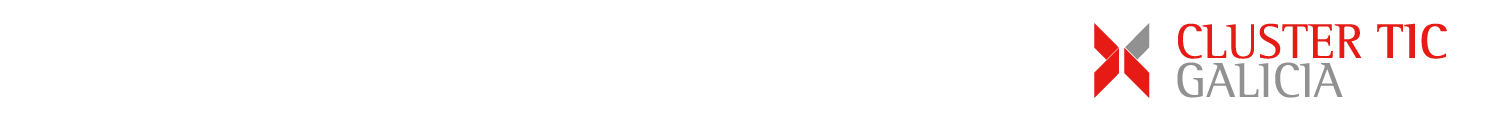

<div style="font-size: 50px;text-align: center;height:70px;line-height: 60px;padding:10px;margin:10px 0 0 0;">Manipulación de estructuras Pandas</div>

1. [Selección de datos](#Selección-de-datos)
1. [Edición de series y dataframes](#Edición-de-series-y-dataframes)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")

# Selección de datos

Un aspecto relativamente complejo involucrado en el uso de las series y los dataframes -principalmente con esta última estructura- es la extracción o selección de datos. Esta relativa complejidad viene derivada principalmente de la abundancia de alternativas y de las excepciones a la norma que algunas de ellas aparentan ser.

Ya se ha comentado que una serie pandas consta de un array de datos, un array de etiquetas implícitas que siempre existe, y posible array de etiquetas explícitas. Si no se indican las etiquetas explícitas, será el array de etiquetas implícitas el que se utilice por defecto en su lugar.

### Selección de datos en series

Si utilizamos la notación corchete y pasamos un único valor, éste deberá ser siempre una etiqueta explícita (o, si no existe, la etiqueta implícita). Así, en una serie sin etiquetas explícitas:

In [3]:
s = pd.Series([10, 20, 30, 40])
s

0    10
1    20
2    30
3    40
dtype: int64

In [4]:
s[1]

20

Si se asignan índices de forma explícita:

In [5]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s

a    10
b    20
c    30
d    40
dtype: int64

tendremos que indicar entre corchetes la etiqueta explícita:

In [6]:
s["b"]

20

Y si la serie tiene como etiquetas explícitas números enteros, serán estos los que sirvan de referencia para extraer un valor:

In [7]:
s = pd.Series([2, 3, 4, 5], index = [1, 2, 3, 4])
s

1    2
2    3
3    4
4    5
dtype: int64

In [8]:
s[2]

3

Comprobamos que se ha devuelto el valor correspondiente al índice $2$, no al valor situado en la posición 2.

#### Uso de rangos

Siguiendo con esta la notación tipo diccionario, es posible seleccionar rangos de valores. En este caso hay que distinguir dos escenarios: aquel en el que el rango es numérico, y aquel en el que el rango no es numérico.

##### Rango numérico

En este caso estaremos haciendo referencia siempre al índice implícito (es decir, estaremos seleccionando por posición):

Si la serie no tiene índice explícito:

In [9]:
s = pd.Series([10, 20, 30, 40])
s

0    10
1    20
2    30
3    40
dtype: int64

In [10]:
s[1:3]

1    20
2    30
dtype: int64

Si repetimos esto mismo en una serie con índice explícito no numérico:

In [11]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s

a    10
b    20
c    30
d    40
dtype: int64

In [12]:
s[1:3]

b    20
c    30
dtype: int64

seguimos haciendo referencia a las posiciones de los valores.

Por último, si repetimos el mismo proceso en una serie pandas con índice explícito numérico:

In [13]:
s = pd.Series([10, 20, 30, 40], index = [1, 2, 3, 4])
s

1    10
2    20
3    30
4    40
dtype: int64

In [14]:
s[1:3]

2    20
3    30
dtype: int64

vemos que sigue siendo el índice implícito el que se ha considerado.

Si en algún caso no se incluye alguno de los límites, el comportamiento es el estándar en Python: si no se incluye el primer valor, se consideran todos los elementos desde el principio hasta el segundo valor (sin incluir), y si no se incluye el segundo valor, se consideran todos los elementos desde el primer valor hasta el final:

In [15]:
s[:3]

1    10
2    20
3    30
dtype: int64

In [16]:
s[1:]

2    20
3    30
4    40
dtype: int64

##### Rangos no numéricos

Si la serie tiene un índice explícito no numérico y se utilizan los índices explícitos en el rango, el comportamiento es ligeramente diferente:

In [17]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s

a    10
b    20
c    30
d    40
dtype: int64

In [18]:
s["a":"c"]

a    10
b    20
c    30
dtype: int64

Vemos cómo se incluyen los valores desde el primer índice hasta el último índice, ambos incluidos.

Aquí también podemos obviar el uso de alguno de los dos límites:

In [19]:
s[:"c"]

a    10
b    20
c    30
dtype: int64

In [20]:
s["b":]

b    20
c    30
d    40
dtype: int64

Para permitirnos especificar si nos referimos a etiquetas implícitas o explícitas (con independencia de la naturaleza del índice explícito) existen los atributos **loc** e **iloc** que veremos poco más adelante y que devuelven instancias de una clase especializada para realizar selecciones.

#### Uso de listas

Al igual que con los array NumPy, es posible indicar, no un elemento simple ni un rango, sino una lista de valores y, en este caso, los valores deberán ser etiquetas explícitas (si existen. Si no, habrá que hacer referencia a las etiquetas implícitas). Por ejemplo, si se trata de una serie sin etiquetas explícitas:

In [21]:
s = pd.Series([10, 20, 30, 40])
s

0    10
1    20
2    30
3    40
dtype: int64

In [22]:
s[[2, 0]]

2    30
0    10
dtype: int64

Si se trata de una serie con etiquetas explícitas no numéricas:

In [23]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s

a    10
b    20
c    30
d    40
dtype: int64

In [24]:
s[["c", "a"]]

c    30
a    10
dtype: int64

Y, por último, si la serie tiene etiquetas explícitas numéricas, serían éstas las consideradas:

In [25]:
s = pd.Series([10, 20, 30, 40], index = [1, 2, 3, 4])
s

1    10
2    20
3    30
4    40
dtype: int64

In [26]:
s[[3, 1]]

3    30
1    10
dtype: int64

#### El método get

El método [get](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.get.html) devuelve el valor que ocupa el índice explícito indicado "de forma segura". Es decir, no devuelve un error en el caso de que el elemento en cuestión no exista. Por el contrario, devuelve un valor nulo (se puede personalizar este resultado).

In [27]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s

a    10
b    20
c    30
d    40
dtype: int64

In [28]:
s.get("b")

20

Si intentamos acceder al elemento cuyo índice explícito es "e":

In [29]:
s.get("e")

el método devuelve el valor *None* por defecto (personalizable usando el parámetro **default**):

In [30]:
s.get("e", default = 0)

0

#### El atributo loc

Como se ha comentado, para evitar ambigüedades y permitirnos especificar de forma clara si estamos haciendo referencia al índice implícito o al índice explícito es por lo que existen los atributos *loc* e *iloc*.

Así, el atributo [pandas.Series.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.loc.html) permite seleccionar un grupo de elementos por etiquetas.

##### Uso con etiqueta simple

Como argumento puede utilizarse una única etiqueta:

In [31]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s

a    10
b    20
c    30
d    40
dtype: int64

In [32]:
s.loc["b"]

20

En este caso el argumento se interpreta siempre como etiqueta explícita.

##### Uso con una lista de etiquetas

También podemos pasar al método una lista de etiquetas, en cuyo caso se extraen los valores correspondientes a dichas etiquetas explícitas y en el orden en el que se incluyen en la lista:

In [33]:
s.loc[["d", "a"]]

d    40
a    10
dtype: int64

##### Uso con un rango de etiquetas

Otra opción es pasar al método un rango:

In [34]:
s["b":"d"]

b    20
c    30
d    40
dtype: int64

Comprobamos que, cuando usamos etiquetas explícitas, el rango siempre es cerrado por ambos extremos.

#### El atributo iloc

El atributo [pandas.Series.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iloc.html) permite extraer datos de la serie a partir de los índices implícitos (o posiciones) que éstos tienen asignados.

##### Uso con un número entero

La opción más simple es utilizar como argumento un simple número entero (el primer elemento de la serie recibe el índice cero):

In [35]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s

a    10
b    20
c    30
d    40
dtype: int64

In [36]:
s.iloc[1]

20

Si el número es negativo, hace referencia al final de la serie (en este caso, el último elemento recibe el índice -1):

In [37]:
s.iloc[-1]

40

In [38]:
s.iloc[-4]

10

##### Uso con una lista de números

Una segunda opción es pasar como argumento una lista o array de números, en cuyo caso se devuelven los elementos que ocupan dichas posiciones en el orden indicado en la lista o array:

In [39]:
s.iloc[[2, 0]]

c    30
a    10
dtype: int64

También podemos incluir en esta lista números negativos, con la funcionalidad ya comentada:

In [40]:
s.iloc[[-2, 0]]

c    30
a    10
dtype: int64

##### Uso con un rango de números

Una tercera opción es usar como argumento un rango de números:

In [41]:
s

a    10
b    20
c    30
d    40
dtype: int64

In [42]:
s.iloc[1:3]

b    20
c    30
dtype: int64

En este caso, el rango es cerrado por la izquierda y abierto por la derecha.

Como es habitual, si no se especifica el primer valor, se consideran todos los elementos desde el principio de la serie:

In [43]:
s.iloc[:3]

a    10
b    20
c    30
dtype: int64

Y, si no se especifica el segundo valor, se consideran todos los elementos hasta el final de la serie:

In [44]:
s.iloc[2:]

c    30
d    40
dtype: int64

También pueden usarse valores negativos para indicar el comienzo y/o el final del rango:

In [45]:
s.iloc[1:-1]

b    20
c    30
dtype: int64

#### Uso de arrays booleanos

Una muy interesante opción para seleccionar elementos de una serie pandas es usar arrays booleanos. Por ejemplo, partimos de la siguiente serie:

In [46]:
s = pd.Series([5, 2, -3, 7, 8, 4])
s

0    5
1    2
2   -3
3    7
4    8
5    4
dtype: int64

Podemos seleccionar un conjunto de valores de la misma haciendo referencia al nombre de la serie y, entre los corchetes, una lista o array de booleanos (también puede ser una serie de booleanos, como veremos un poco más adelante). Esta lista deberá tener tantos booleanos como valores tenga la serie:

In [47]:
s[[True, False, False, True, True, False]]

0    5
3    7
4    8
dtype: int64

Comprobamos que el resultado está formado por aquellos valores para los que el booleano correspondiente era *True*.

Esta lista o array de booleanos no tiene porqué ser especificada de forma explícita, puede ser el resultado de una expresión:

In [48]:
s > 2

0     True
1    False
2    False
3     True
4     True
5     True
dtype: bool

Aquí, hemos usado la expresión s > 2 para generar una serie pandas de booleanos, serie en la que los valores toman el valor *True* cuando el valor con el mismo índice de s toma un valor mayor estricto que 2.

Podemos entonces usar este resultado para extraer valores de la serie *s*:

In [49]:
s[s > 2]

0    5
3    7
4    8
5    4
dtype: int64

obteniendo los valores de *s* que son mayores que 2.

Este mismo enfoque puede ser usado con los atributos **pandas.Series.loc** y **pandas.Series.iloc** ya vistos en las secciones anteriores con algún matiz adicional:

El atributo *loc* puede ser usado tanto con un array explícito de booleanos:

In [50]:
s.loc[[True, False, False, True, True, False]]

0    5
3    7
4    8
dtype: int64

como con una expresión que genere, por ejemplo, una serie pandas de booleanos:

In [51]:
s.loc[s > 2]

0    5
3    7
4    8
5    4
dtype: int64

Sin embargo, el atributo *iloc* tiene un comportamiento ligeramente diferente. Puede ser usado con arrays explícitos de booleanos:

In [52]:
s.iloc[[True, False, False, True, True, False]]

0    5
3    7
4    8
dtype: int64

pero el uso de expresiones que generen una serie pandas de booleanos devuelve un error:

In [53]:
try:
    s.iloc[s > 2]
except:
    print("Error")

Error


Si el objeto que está generando la estructura de booleanos (s, en s > 2) fuese un array NumPy en lugar de tratarse de una serie pandas, sí sería posible usar el atributo *iloc*. De esta forma, la expresión s > 2 genera, como hemos visto, una serie pandas, pero podemos extraer los valores con el atributo **.values**, que genera un array numpy:

In [54]:
s.iloc[(s > 2).values]

0    5
3    7
4    8
5    4
dtype: int64

Es por ello que Pandas recomienda usar siempre el atributo **loc** cuando trabajemos con selección basada en booleanos.

#### Selección aleatoria

También podemos realizar una selección aleatoria a partir de una serie. El método [pandas.Series.sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sample.html) permite especificar o bien el número de elementos a extraer o bien la fracción del número total de elementos a extraer (parámetros **n** y **frac**, respectivamente), pudiendo especificar si la extracción se realiza con reemplazo o no (parámetro **replace**), los pesos a aplicar a cada elemento para realizar una extracción aleatoria ponderada (parámetro **weights**), y una semilla para el generador de números aleatorios que asegure la reproducibilidad de la extracción (parámetro **random_state**). Por ejemplo:

In [55]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s

a    10
b    20
c    30
d    40
dtype: int64

In [56]:
s.sample(n = 3, random_state = 18)

d    40
b    20
a    10
dtype: int64

Hemos extraído 3 elementos, por defecto sin reemplazo, aplicando el valor 18 como semilla del generador de números aleatorios.

In [57]:
s.sample(frac = 0.6, random_state = 18)

d    40
b    20
dtype: int64

En este otro ejemplo hemos extraído el 60% de los valores de la serie original haciendo uso del parámetro **frac**.

Si no hay reemplazo, el número máximo de elementos que podemos extraer coincide con la longitud de la serie. Pero si la extracción la realizamos con reemplazo, podemos especificar cualquier número de elementos:

In [58]:
s.sample(10, random_state = 18, replace = True)

c    30
d    40
a    10
b    20
c    30
b    20
c    30
c    30
c    30
a    10
dtype: int64

#### El método pop

El método [pandas.Series.pop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.pop.html) extrae y elimina un elemento de una serie cuyo índice se indica como argumento:

In [59]:
s = pd.Series([1, 2, 3, 4])
s.pop(1)

2

In [60]:
s

0    1
2    3
3    4
dtype: int64

devolviendo un error en caso de que no exista:

In [61]:
s = pd.Series([1, 2, 3, 4])

In [62]:
try:
    s.pop(18)
except:
    print("Error")

Error


Si la serie tiene un índice explícito, el argumento de **pop** deberá hacer referencia a este índice:

In [63]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s.pop("a")

10

### Selección de datos en dataframes

Desde un punto de vista semántico, un dataframe puede ser considerado semejante a un diccionario de series, en el que las claves son los nombres de las columnas y, los valores, las columnas (que son series pandas). En este ejemplo:

In [64]:
sales = pd.DataFrame(
    data = np.random.randint(0, 21, size = (6, 5)),
    index = ["jan", "feb", "mar", "apr", "may", "jun"],
    columns = list("ABCDE")
)
sales

,A,B,C,D,E
jan,15,3,16,13,16
feb,15,4,3,4,18
mar,14,6,8,8,16
apr,6,5,18,5,17
may,15,6,19,6,16
jun,18,12,19,3,14


podemos utilizar la sintaxis de los diccionarios para seleccionar la columna "B":

In [65]:
sales["B"]

jan     3
feb     4
mar     6
apr     5
may     6
jun    12
Name: B, dtype: int32

Esto significa que podemos realizar una selección en dicho resultado para, por ejemplo, extraer el valor correspondiente a febrero:

In [66]:
sales["B"]["feb"]

4

Sin embargo, la más que razonable opción de eliminar los corchetes que separan ambos índices y sustituirlos por una coma no funciona:

In [67]:
try:
    sales["B", "feb"]
except:
    print("Error")

Error


Si, una vez seleccionada una columna, le asignamos una lista o array (o serie) de valores de la misma longitud, estamos modificando dicha columna del dataframe:

In [68]:
sales["B"] = [-1, -2, -3, -4, -5, -6]
sales

,A,B,C,D,E
jan,15,-1,16,13,16
feb,15,-2,3,4,18
mar,14,-3,8,8,16
apr,6,-4,18,5,17
may,15,-5,19,6,16
jun,18,-6,19,3,14


Si asignamos un único valor escalar, este se propaga por toda la columna:

In [69]:
sales["C"] = 0
sales

,A,B,C,D,E
jan,15,-1,0,13,16
feb,15,-2,0,4,18
mar,14,-3,0,8,16
apr,6,-4,0,5,17
may,15,-5,0,6,16
jun,18,-6,0,3,14


Si estuviésemos asignando un array cuya longitud no coincidiese con la de la columna (y no estuviésemos asignando un escalar), obtendríamos un error.

In [70]:
try:
    sales["C"] = [1, 2]
except ValueError:
    print("ValueError")

ValueError


Si asignamos a una columna una serie pandas se consideran los índices del dataframe y de la serie, haciendo coincidir los valores cuyos índices sean los mismos en ambas estructuras (si dicha columna no existe, se crea). En el caso de que haya valores en la serie con índices que no se encuentren en el dataframe, se descartan. Y en el caso de que haya índices en el dataframe que no se encuentren en la serie, se asigna un valor *NaN*.

Así, en el siguiente ejemplo, estamos asignando a la columna "D" una serie cuyos índices son "ene", "mar", "abr" y "jul". Es decir, la serie no tiene un valor para los índices "feb", "may" y "jun" que sí se encuentra en el dataframe (se asignará un *NaN*), e incluye el índice "jul" que no se encuentra en el dataframe y se descarta:

In [71]:
sales["D"] = pd.Series(
    [1, 2, 3, 4],
    index = ["ene", "mar", "apr", "jul"]
)
sales

,A,B,C,D,E
jan,15,-1,0,NaN,16
feb,15,-2,0,NaN,18
mar,14,-3,0,2.0,16
apr,6,-4,0,3.0,17
may,15,-5,0,NaN,16
jun,18,-6,0,NaN,14


Los valores asignados a una columna pueden proceder del propio dataframe:

In [72]:
sales["D"] = (2 * sales["A"]) / (2 - sales["E"])
sales

,A,B,C,D,E
jan,15,-1,0,-2.142857,16
feb,15,-2,0,-1.875000,18
mar,14,-3,0,-2.000000,16
apr,6,-4,0,-0.800000,17
may,15,-5,0,-2.142857,16
jun,18,-6,0,-3.000000,14


También podemos acceder a una columna con la llamada "*notación punto*":

In [73]:
sales.A

jan    15
feb    15
mar    14
apr     6
may    15
jun    18
Name: A, dtype: int32

Deberemos tener en cuenta que con esta notación no es posible crear nuevas columnas ni eliminarlas con la declaración *del* y que solo funcionará si el nombre de la columna no incluye espacios en blanco ni caracteres especiales, y no coincide con ninguna palabra reservada de Python:

In [74]:
try:
    del(sales.A)
except:
    print("Error")

Error


lo que sí puede hacerse con el operador selección:

In [75]:
del(sales["A"])

In [76]:
sales

,B,C,D,E
jan,-1,0,-2.142857,16
feb,-2,0,-1.875000,18
mar,-3,0,-2.000000,16
apr,-4,0,-0.800000,17
may,-5,0,-2.142857,16
jun,-6,0,-3.000000,14


#### Uso de rangos

El uso de un rango numérico entre los corchetes realiza una selección de filas, lo que puede parecer una cierta incoherencia:

In [77]:
sales = pd.DataFrame(
    data = np.random.randint(0, 21, size = (6, 5)),
    index = ["jan", "feb", "mar", "apr", "may", "jun"],
    columns = list("ABCDE")
)
sales

,A,B,C,D,E
jan,3,1,5,1,5
feb,13,7,10,20,2
mar,2,13,2,8,3
apr,8,6,1,14,7
may,3,7,6,19,14
jun,15,15,0,12,17


In [78]:
sales[2:4]

,A,B,C,D,E
mar,2,13,2,8,3
apr,8,6,1,14,7


El equipo de pandas lo justifica diciendo que esta sintaxis resulta extremadamente conveniente al tratarse de un tipo de selección frecuentemente usada para la selección de filas. Esto es cierto, pero el hecho de que selecciones aparentemente semejantes (df[1,2], df[[1, 2]], df[1:3, 5], etc.) devuelvan un error no facilita su comprensión.

En todo caso, vemos en el resultado anterior que se devuelven las filas entre el primer valor del rango (incluido) y el último (sin incluir). También podríamos haber usado las etiquetas del índice:

In [79]:
sales["feb":"may"]

,A,B,C,D,E
feb,13,7,10,20,2
mar,2,13,2,8,3
apr,8,6,1,14,7
may,3,7,6,19,14


aunque en este caso la selección incluye tanto la fila correspondiente a la primera etiqueta como la fila correspondiente a la segunda.

También podemos obviar la inclusión del primer o del segundo valor, considerándose las filas desde el comienzo/hasta el final del dataframe:

In [80]:
sales[:3]

,A,B,C,D,E
jan,3,1,5,1,5
feb,13,7,10,20,2
mar,2,13,2,8,3


In [81]:
sales[3:]

,A,B,C,D,E
apr,8,6,1,14,7
may,3,7,6,19,14
jun,15,15,0,12,17


O haciendo uso de etiquetas:

In [82]:
sales["mar":]

,A,B,C,D,E
mar,2,13,2,8,3
apr,8,6,1,14,7
may,3,7,6,19,14
jun,15,15,0,12,17


In [83]:
sales[:"may"]

,A,B,C,D,E
jan,3,1,5,1,5
feb,13,7,10,20,2
mar,2,13,2,8,3
apr,8,6,1,14,7
may,3,7,6,19,14


#### Uso de listas

Si, al realizar la selección, situamos entre los corchetes una lista de etiquetas, estaremos seleccionando columnas en el orden en el que aparecen en la lista y con formato dataframe:

In [84]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [85]:
tips[["tip", "day"]].head()

,tip,day
0,1.01,Sun
1,1.66,Sun
2,3.50,Sun
3,3.31,Sun
4,3.61,Sun


El resultado es un dataframe:

In [86]:
print(type(tips[["tip", "day"]]))

<class 'pandas.core.frame.DataFrame'>


Y el resultado es un dataframe aun cuando solo se extraiga una única columna:

In [87]:
tips[["tip"]].head()

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61


In [88]:
type(tips[["tip"]].head())

pandas.core.frame.DataFrame

#### El método get

También es posible extraer de forma segura una columna de un dataframe usando el método [pandas.DataFrame.get](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.get.html). Éste extrae la columna indicada devolviendo un valor alternativo (por defecto *None*) si dicha columna no existe:

In [89]:
sales

,A,B,C,D,E
jan,3,1,5,1,5
feb,13,7,10,20,2
mar,2,13,2,8,3
apr,8,6,1,14,7
may,3,7,6,19,14
jun,15,15,0,12,17


In [90]:
sales.get("A")

jan     3
feb    13
mar     2
apr     8
may     3
jun    15
Name: A, dtype: int32

In [91]:
sales.get("H")

#### El atributo loc

Al igual que ocurre con las series, el atributo [pandas.DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) permite seleccionar valores por etiquetas.

En general, deberemos pasar entre corchetes dos grupos de etiquetas: las correspondientes al eje 0 (filas) y las correspondientes al eje 1 (columnas). Si solo pasamos un grupo, se sobreentiende que se corresponde con las etiquetas a seleccionar en el eje 0 y que, por lo tanto, queremos seleccionar todos los valores correspondientes del eje 1.

Para probar las diferentes combinaciones, partamos del mismo dataframe:

In [92]:
sales

,A,B,C,D,E
jan,3,1,5,1,5
feb,13,7,10,20,2
mar,2,13,2,8,3
apr,8,6,1,14,7
may,3,7,6,19,14
jun,15,15,0,12,17


##### Uso con etiqueta simple

El primer escenario lo encontramos cuando usamos este atributo indicando una única etiqueta. En este caso estamos seleccionando la fila cuya etiqueta se indique:

In [93]:
sales.loc["may"]

A     3
B     7
C     6
D    19
E    14
Name: may, dtype: int32

El resultado es una serie pandas que se corresponde con la fila seleccionada. Comprobamos que incluye las etiquetas de columnas del dataframe original como índice.

##### Uso con una lista de etiquetas

Si el único argumento que se pasa es una lista de etiquetas, se devolverán las filas referenciadas por dichas etiquetas en el orden indicado:

In [94]:
sales

,A,B,C,D,E
jan,3,1,5,1,5
feb,13,7,10,20,2
mar,2,13,2,8,3
apr,8,6,1,14,7
may,3,7,6,19,14
jun,15,15,0,12,17


In [95]:
sales.loc[["jun", "jan", "feb"]]

,A,B,C,D,E
jun,15,15,0,12,17
jan,3,1,5,1,5
feb,13,7,10,20,2


Al contrario de lo que ocurre cuando solo indicamos una etiqueta, el resultado es un dataframe. Y lo es aún cuando la lista contenga un único elemento:

In [96]:
sales.loc[["feb"]]

,A,B,C,D,E
feb,13,7,10,20,2


In [97]:
print(type(sales.loc[["feb"]]))

<class 'pandas.core.frame.DataFrame'>


##### Uso con rangos

Otra opción es utilizar rangos definidos por etiquetas. De esta forma, si continuamos con el mismo ejemplo:

In [98]:
sales.loc["feb":"apr"]

,A,B,C,D,E
feb,13,7,10,20,2
mar,2,13,2,8,3
apr,8,6,1,14,7


Obsérvese que la selección incluye las filas de los extremos del rango.

##### Extracción de filas y columnas

En los ejemplos vistos hasta ahora estamos extrayendo una o varias filas para todas las columnas. En posible, por supuesto, especificar qué filas y qué columnas exactas queremos extraer, para lo que no hay más que pasar los índices de ambos ejes.

Así, si utilizamos una única etiqueta para indicar la fila y una única etiqueta para indicar la columna separadas por una coma, estaremos extrayendo un único valor:

In [99]:
sales

,A,B,C,D,E
jan,3,1,5,1,5
feb,13,7,10,20,2
mar,2,13,2,8,3
apr,8,6,1,14,7
may,3,7,6,19,14
jun,15,15,0,12,17


In [100]:
sales.loc["may", "C"]

6

Podemos sustituir una de las dos etiquetas por el símbolo de dos puntos ($:$), lo que supondrá seleccionar todos los elementos de ese eje:

In [101]:
sales.loc[:, "A"]

jan     3
feb    13
mar     2
apr     8
may     3
jun    15
Name: A, dtype: int32

In [102]:
sales.loc["jun", :]

A    15
B    15
C     0
D    12
E    17
Name: jun, dtype: int32

Esto supone que, por ejemplo, las dos expresiones siguientes devuelven el mismo resultado:

In [103]:
sales.loc["may"]

A     3
B     7
C     6
D    19
E    14
Name: may, dtype: int32

In [104]:
sales.loc["may", :]

A     3
B     7
C     6
D    19
E    14
Name: may, dtype: int32

Los métodos de selección vistos pueden combinarse. Podemos, por ejemplo, seleccionar la intersección de las filas $e$ y $c$ (en este orden) y la columna $B$:

In [105]:
sales.loc[["may", "jan"], "B"]

may    7
jan    1
Name: B, dtype: int32

#### El atributo iloc

El atributo [pandas.DataFrame.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) permite realizar selecciones por posición. Tal y como cabría esperar, pueden utilizarse diferentes tipos de argumentos que determinan qué elementos se están extrayendo.

##### Uso con un número entero

En este primer caso estamos seleccionando la fila cuyo índice se indica:

In [106]:
sales

,A,B,C,D,E
jan,3,1,5,1,5
feb,13,7,10,20,2
mar,2,13,2,8,3
apr,8,6,1,14,7
may,3,7,6,19,14
jun,15,15,0,12,17


In [107]:
sales.iloc[2]

A     2
B    13
C     2
D     8
E     3
Name: mar, dtype: int32

Si el número es negativo, hace referencia al final del dataframe. Así, siguiendo con este último ejemplo:

In [108]:
sales.iloc[-1]

A    15
B    15
C     0
D    12
E    17
Name: jun, dtype: int32

##### Uso con una lista de números

Si utilizamos como argumento una lista o array de números, estamos extrayendo las filas cuyos índices son los elementos del mismo, y en el orden en el que aparecen en él:

In [109]:
sales

,A,B,C,D,E
jan,3,1,5,1,5
feb,13,7,10,20,2
mar,2,13,2,8,3
apr,8,6,1,14,7
may,3,7,6,19,14
jun,15,15,0,12,17


In [110]:
sales.iloc[[3, 1]]

,A,B,C,D,E
apr,8,6,1,14,7
feb,13,7,10,20,2


En el ejemplo anterior, estamos extrayendo las filas cuyos índices son 3 y 1, y extrayéndolas en este mismo orden.

Si alguno de los índices es negativo, hará referencia al final de la lista.

##### Uso con un rango de números

Si utilizamos un rango de números, como en el siguiente ejemplo en el que indicamos como argumento 2:4, estamos extrayendo las filas cuyos índices van de la primera cifra del rango incluida (2 en el ejemplo) hasta la última cifra sin incluir (4 en el ejemplo):

In [111]:
sales.iloc[2:4]

,A,B,C,D,E
mar,2,13,2,8,3
apr,8,6,1,14,7


Como suele ser habitual, si no se especifica el primer valor, se consideran todas las filas desde la primera. Y si no se especifica el último valor, se consideran todas las filas hasta la última (incluida):

In [112]:
sales.iloc[:3]

,A,B,C,D,E
jan,3,1,5,1,5
feb,13,7,10,20,2
mar,2,13,2,8,3


In [113]:
sales.iloc[4:]

,A,B,C,D,E
may,3,7,6,19,14
jun,15,15,0,12,17


También pueden usarse valores negativos para especificar el comienzo o el final del rango.

##### Extracción de filas y columnas

Si añadimos un segundo argumento, estaremos haciendo referencia al índice de columnas:

In [114]:
sales.iloc[3, 1]

6

En el ejemplo anterior estamos extrayendo el valor correspondiente a la fila cuyo índice es 3 y a la columna cuyo índice es 1.

#### Selección con índices y etiquetas simultáneamente

En ocasiones nos encontraremos con que resultaría de utilidad poder realizar selecciones mezclando etiquetas e índices, y los métodos vistos, **loc** e **iloc**, solo permiten el uso de etiquetas o de índices, respectivamente. Para poder mezclar ambos tipos de referencias podemos recurrir a los métodos [pandas.Index.get_loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.get_loc.html) y [pandas.Index.get_indexer](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.get_indexer.html), métodos asociados a los índices de un dataframe:

El primero, **get_loc**, devuelve el índice (posición) de la etiqueta que se pase como argumento. El segundo, **get_indexer**, devuelve un array con los índices (posiciones) de las etiquetas que se pasen en forma de lista como argumento.

Por ejemplo, partimos del siguiente dataframe:

In [115]:
sales

,A,B,C,D,E
jan,3,1,5,1,5
feb,13,7,10,20,2
mar,2,13,2,8,3
apr,8,6,1,14,7
may,3,7,6,19,14
jun,15,15,0,12,17


Si aplicamos los métodos comentados al índice de columnas haciendo referencia a sus etiquetas, obtenemos los siguientes resultados:

In [116]:
sales.columns.get_loc("B")

1

In [117]:
sales.columns.get_indexer(["A", "C"])

array([0, 2], dtype=int64)

En el primer caso hemos pasado la etiqueta $B$ y el método ha devuelto su índice (1). En el segundo caso hemos pasado una lista de etiquetas y hemos obtenido un array con sus índices.

Si ejecutamos estos métodos en el índice de filas:

In [118]:
sales.index.get_loc("feb")

1

In [119]:
sales.index.get_indexer(["feb", "apr"])

array([1, 3], dtype=int64)

obtenemos resultados semejantes.

Ahora, para realizar extracciones a partir de etiquetas explícitas e implícitas, no tenemos más que convertir las primeras y usar el atributo *iloc* que hemos visto. Por ejemplo, si quisiéramos extraer del anterior dataframe el dato que ocupa la fila "feb" y la columna de índice 2, podríamos conseguirlo del siguiente modo:

In [120]:
sales.iloc[sales.index.get_loc("feb"), 2]

10

O si deseásemos obtener de las filas 5 y 3 (en este orden) los valores correspondientes a las columnas C y A (en este orden), podríamos hacerlo con la siguiente expresión:

In [121]:
sales.iloc[[5, 3], sales.columns.get_indexer(["C", "A"])]

,C,A
jun,0,15
apr,1,8


#### Uso de listas de booleanos

Otro método especialmente útil para la selección es el uso de listas de booleanos. Al igual que ocurría con las series, este método puede parecer un tanto incoherente aunque su uso es extremadamente conveniente. Veamos por qué:

Si partimos del mismo dataframe usado en la sección anterior, podemos crear una lista de booleanos (que, por motivos puramente pedagógicos, asignamos a una variable *mask*) y realizar la selección con ella:

In [122]:
sales

,A,B,C,D,E
jan,3,1,5,1,5
feb,13,7,10,20,2
mar,2,13,2,8,3
apr,8,6,1,14,7
may,3,7,6,19,14
jun,15,15,0,12,17


In [123]:
mask = [True, False, True, False, False, True]
sales[mask]

,A,B,C,D,E
jan,3,1,5,1,5
mar,2,13,2,8,3
jun,15,15,0,12,17


Vemos que este método ha seleccionado filas del dataframe.

El vector de booleanos deberá tener la misma longitud que el índice de filas (es decir, un booleano por fila) y la selección devolverá aquellas filas para las que el elemento correspondiente del vector tome el valor *True*.

La verdadera potencia de este estilo de selección se pone de manifiesto cuando la máscara se genera a partir de los datos del propio dataframe. Por ejemplo, si queremos seleccionar las filas para las que el valor de la columna A sea mayor que 7:

In [124]:
sales.A > 7

jan    False
feb     True
mar    False
apr     True
may    False
jun     True
Name: A, dtype: bool

In [125]:
sales[sales.A > 7]

,A,B,C,D,E
feb,13,7,10,20,2
apr,8,6,1,14,7
jun,15,15,0,12,17


Este tipo de filtrados resultan muy frecuentes en entornos de análisis, de ahí que la posibilidad de realizarlos sin necesidad de recurrir a atributos o métodos adicionales (*loc*, *iloc* o *get*, por ejemplo) resulte tan conveniente.

Aun así, esta técnica también es compatible con los atributos *loc* e *iloc*, con algún matiz adicional:

Con **loc** podemos usar directamente una expresión de comparación como la vista:

In [126]:
sales.loc[sales.C > 10]

,A,B,C,D,E


Sin embargo, con **iloc** nos veremos obligados a extraer los valores del dataframe resultante de la comparación -tal y como ocurría con las series- pues, de otro modo, obtendremos un error:

In [127]:
try:
    sales.iloc[sales.C > 10]
except:
    print("Error")

Error


In [128]:
sales.iloc[(sales.C > 10).values]

,A,B,C,D,E


<div style="background:#ffffcc;padding:20px;color:#000000">
<div>Evitamos problemas si, tal y como sugiere Pandas, utilizamos siempre el método .loc</div>
</div>

#### Selección aleatoria
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Al igual que ocurre con las series, también los dataframes tienen un método que permite extraer elementos del mismo de forma aleatoria: [pandas.DataFrame.sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html). Este método permite especificar el número de elementos a extraer (o el porcentaje respecto del total, parámetros **&#110;** y **frac**, respectivamente), si la extracción se realiza con reemplazo o no (parámetro **replace**), los pesos a aplicar a los elementos para realizar una extracción aleatoria ponderada (parámetro **weights**) y una semilla para el generador de números aleatorios que asegure la reproducibilidad de la extracción (parámetro **random_state**). También es posible indicar el eje a lo largo del cual se desea realizar la extracción (por defecto se extraen filas, correspondiente al eje 0).

Veamos un ejemplo. Si partimos del dataframe de ventas:

In [129]:
sales

,A,B,C,D,E
jan,3,1,5,1,5
feb,13,7,10,20,2
mar,2,13,2,8,3
apr,8,6,1,14,7
may,3,7,6,19,14
jun,15,15,0,12,17


podemos extraer 3 filas de forma aleatoria, sin reemplazo (opción por defecto) y fijando como semilla del generador de números aleatorios el número 18, de la siguiente forma:

In [130]:
sales.sample(n = 3, random_state = 18)

,A,B,C,D,E
jun,15,15,0,12,17
may,3,7,6,19,14
feb,13,7,10,20,2


Si especificamos como eje el valor 1, estaremos extrayendo columnas:

In [131]:
sales.sample(2, random_state = 18, axis = 1)

,E,B
jan,5,1
feb,2,7
mar,3,13
apr,7,6
may,14,7
jun,17,15


Si hacemos uso del parámetro **frac**, podemos especificar el porcentaje de elementos a extraer:

In [132]:
sales.sample(frac = 0.6, random_state = 18)

,A,B,C,D,E
jun,15,15,0,12,17
may,3,7,6,19,14
feb,13,7,10,20,2
jan,3,1,5,1,5


#### Resumen de tipos de selección

La cantidad de posibilidades que nos ofrece la librería pandas a la hora de extraer información de un dataframe puede resultar un tanto abrumadora. Veamos un resumen de las principales técnicas vistas:

##### Operador selección (notación corchete).

Solo puede pasarse un argumento. Este puede ser:
* Un valor simple. Hará referencia al nombre de una columna (a su etiqueta explícita).
* Un rango. Hará referencia a un conjunto de filas (por posición o nombre)
* Una lista. Hará referencia a columnas (por nombres)
* Una lista de booleanos. Hará referencia a filas (a aquellas para las que el booleano correspondiente tome el valor *True*).

##### Atributo loc

Este atributo permite hacer referencia a los valores a extraer por nombre (es decir, por las etiquetas explícitas -si existen-). Se pueden pasar uno o dos argumentos. El primero hace referencia a las etiquetas de filas y el segundo a las etiquetas de columnas. Si no se indica el segundo, se extraerán todas las columnas para las filas indicadas.

##### Atributo iloc

Este atributo permite hacer referencia a los valores a extraer por posición (es decir, por las etiquetas implícitas).  Se pueden pasar uno o dos argumentos. El primero hace referencia a las posiciones de filas, y el segundo a las posiciones de columnas. Si no se indica el segundo, se extraerán todas las columnas para las filas indicadas.

Los argumentos a pasar a los atributos *loc* e *iloc* pueden ser valores simples, rangos, listas o listas de booleanos. En el caso de usar rangos basados en posición, éstos serán abiertos por la derecha. Si usamos rangos basados en etiquetas, serán cerrados por la derecha.

#### El método pop

Otra forma de extraer datos es la proporcionada por el método [pandas.DataFrame.pop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html), que extrae y elimina una columna de un dataframe:

In [133]:
sales

,A,B,C,D,E
jan,3,1,5,1,5
feb,13,7,10,20,2
mar,2,13,2,8,3
apr,8,6,1,14,7
may,3,7,6,19,14
jun,15,15,0,12,17


In [134]:
df = sales.copy()   # Para no modificar el dataframe "sales" original
s = df.pop("B")
s

jan     1
feb     7
mar    13
apr     6
may     7
jun    15
Name: B, dtype: int32

In [135]:
df

,A,C,D,E
jan,3,5,1,5
feb,13,10,20,2
mar,2,2,8,3
apr,8,1,14,7
may,3,6,19,14
jun,15,0,12,17


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Edición de series y dataframes

Veamos las diferentes formas que tenemos para modificar las series y dataframes:

### Edición de series

Podemos modificar un valor de una serie usando el operador selección (la notación corchete), y haciendo referencia a las etiquetas explícitas (si existen. Si no, a las etiquetas implícitas):

In [136]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [137]:
s["b"] = -2
s

a    1
b   -2
c    3
d    4
e    5
dtype: int64

O con un rango, en cuyo caso podremos hacer referencia a índices o etiquetas:

In [138]:
s[1:3] = 0
s

a    1
b    0
c    0
d    4
e    5
dtype: int64

In [139]:
s["b":"d"] = -10
s

a     1
b   -10
c   -10
d   -10
e     5
dtype: int64

El valor que asignemos puede ser un escalar -en cuyo caso se propaga- o puede ser una lista del tamaño del rango:

In [140]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [141]:
s[1:3] = [-1, -2]
s

a    1
b   -1
c   -2
d    4
e    5
dtype: int64

In [142]:
s["b":"d"] = [10, 11, 12]
s

a     1
b    10
c    11
d    12
e     5
dtype: int64

Si el índice explícito al que hacemos referencia no existe, se añade:

In [143]:
s["f"] = 0
s

a     1
b    10
c    11
d    12
e     5
f     0
dtype: int64

Si el rango incluye valores que no existen, se ignoran:

In [144]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s["d":"h"] = 0
s

a    1
b    2
c    3
d    0
e    0
dtype: int64

Podemos incluir como argumento del operador selección una lista de etiquetas explícitas, en cuyo caso los valores se asignan en el orden indicado:

In [145]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [146]:
s[["c", "a"]] = [-1, -2]
s

a   -2
b    2
c   -1
d    4
e    5
dtype: int64

o podemos usar los atributos *loc* e *iloc* para especificar a qué estamos haciendo referencia:

In [147]:
s = pd.Series([1, 2, 3, 4, 5], index = [0, 1, 2, 3, 4])
s.iloc[1] = -1
s

0    1
1   -1
2    3
3    4
4    5
dtype: int64

#### Eliminación de elementos

##### El método drop

El método [pandas.Series.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.drop.html) devuelve una copia de la serie tras eliminar el elemento cuya etiqueta explícita se especifica como argumento:

In [148]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [149]:
r = s.drop("b")
r

a    1
c    3
d    4
e    5
dtype: int64

En este ejemplo hemos pasado como único argumento la etiqueta del elemento a eliminar, y el método ha devuelto la serie sin dicho elemento. Si la etiqueta no se encontrase en la serie, se devolvería un error.

También podemos pasar como argumento no una etiqueta, sino una lista de etiquetas. En este caso se eliminarán todos los elementos con dichas etiquetas:

In [150]:
r = s.drop(["d", "a"])
r

b    2
c    3
e    5
dtype: int64

Obsérvese que las etiquetas no tienen que estar en orden.

El argumento *inplace = True* realiza la eliminación "inplace" (modificando directamente la serie).

Este método exige el uso de etiquetas para seleccionar los elementos a eliminar. Esto significa que si en un momento dado necesitamos eliminar uno o más elementos por su índice, deberemos convertirlos en sus correspondientes etiquetas, lo que resulta extremadamente sencillo seleccionando los elementos adecuados del index.

En el siguiente ejemplo, partimos del mismo ejemplo ya visto anteriormente:

In [151]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

Si quisiéramos eliminar los elementos cuyos índices son 1 y 3, bastaría recordar que el atributo *index* devuelve todas las etiquetas y que s.index[[1, 3]] devuelve las correspondientes a dichos índices:

In [152]:
s.index[[1, 3]]

Index(['b', 'd'], dtype='object')

Si pasamos esta expresión como argumento del método *drop*, obtendremos el resultado esperado:

In [153]:
s.drop(s.index[[1, 3]])

a    1
c    3
e    5
dtype: int64

##### El método pop

Otra forma que tenemos a nuestra disposición para eliminar un elemento de una serie es el método [pandas.Series.pop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.pop.html). Al igual que con el método *drop*, éste solo acepta una etiqueta explícita y devuelve el valor correspondiente a dicha etiqueta, eliminándolo de la serie in-place:

In [154]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [155]:
s.pop("b")

2

In [156]:
s

a    1
c    3
d    4
e    5
dtype: int64

Si la etiqueta no se encontrase en el index, el método devolvería un error.

#### El método where

El método [pandas.Series.where](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.where.html) permite filtrar los valores de una serie de forma que solo los que cumplan cierta condición se mantengan. Los valores que no la cumplan son sustituidos por un valor (*NaN* por defecto):

In [157]:
s = pd.Series(np.arange(0, 10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

Supongamos ahora que queremos filtrar los valores de $s$ que sean pares:

In [158]:
s.where(s % 2 == 0)

0    0.0
1    NaN
2    2.0
3    NaN
4    4.0
5    NaN
6    6.0
7    NaN
8    8.0
9    NaN
dtype: float64

Comprobamos que los valores que no cumplen la condición son sustituidos por *NaN*. Podemos modificar este valor de reemplazo pasando como segundo argumento el valor que queremos fijar:

In [159]:
s.where(s % 2 == 0, -1)

0    0
1   -1
2    2
3   -1
4    4
5   -1
6    6
7   -1
8    8
9   -1
dtype: int32

### Edición de dataframes

Podemos modificar un valor concreto usando los métodos **loc** o **iloc**, en función de que queramos usar sus etiquetas o índices:

In [160]:
sales = pd.DataFrame(
    data = np.random.randint(0, 21, size = (6, 5)),
    index = ["jan", "feb", "mar", "apr", "may", "jun"],
    columns = list("ABCDE")
)
sales

,A,B,C,D,E
jan,3,17,3,3,12
feb,7,14,15,1,15
mar,15,17,1,2,10
apr,3,12,10,3,11
may,7,12,15,15,11
jun,6,10,14,19,13


In [161]:
df = sales.copy()
df.iloc[1, 2] = -100
df

,A,B,C,D,E
jan,3,17,3,3,12
feb,7,14,-100,1,15
mar,15,17,1,2,10
apr,3,12,10,3,11
may,7,12,15,15,11
jun,6,10,14,19,13


Podemos modificar una columna completa seleccionándola y asignándole, por ejemplo, una lista con los nuevos valores. Si partimos del mismo ejemplo que en el caso anterior:

In [162]:
df["C"] = [-100, -200, -300, -400, -500, -600]
df

,A,B,C,D,E
jan,3,17,-100,3,12
feb,7,14,-200,1,15
mar,15,17,-300,2,10
apr,3,12,-400,3,11
may,7,12,-500,15,11
jun,6,10,-600,19,13


En este caso, la longitud de la lista conteniendo los valores a insertar deberá coincidir con la longitud de la columna, salvo que en lugar de una lista se esté asignando un único valor, en cuyo caso se propagará a toda la columna.

In [163]:
df["C"] = -1
df

,A,B,C,D,E
jan,3,17,-1,3,12
feb,7,14,-1,1,15
mar,15,17,-1,2,10
apr,3,12,-1,3,11
may,7,12,-1,15,11
jun,6,10,-1,19,13


Si la selección es un bloque de datos de un tamaño arbitrario (bidimensional, en general), nos encontramos en el mismo escenario: o bien insertamos datos con el mismo tamaño que la selección, o insertamos un único valor que se propagará a toda la selección. Veamos el primer caso:

In [164]:
df = sales.copy()
df.loc["feb":"mar", "A":"B"] = [[-100, -200], [-300, -400]]
df

,A,B,C,D,E
jan,3,17,3,3,12
feb,-100,-200,15,1,15
mar,-300,-400,1,2,10
apr,3,12,10,3,11
may,7,12,15,15,11
jun,6,10,14,19,13


En este ejemplo hemos seleccionado un bloque de dimensiones 2x2, y hemos insertado datos con una estructura con las mismas dimensiones.

In [165]:
df = sales.copy()
df.loc["feb":"mar", "A":"B"] = -1
df

,A,B,C,D,E
jan,3,17,3,3,12
feb,-1,-1,15,1,15
mar,-1,-1,1,2,10
apr,3,12,10,3,11
may,7,12,15,15,11
jun,6,10,14,19,13


y en este segundo caso hemos asignado un único valor a la misma selección.

Si intentamos asignar datos a una columna o fila inexistente, ésta se crea y se le asignan los valores en cuestión. En el primer caso (de columna inexistente):

In [166]:
df["F"] = [-1, -2, -3, -4, -5, -6]
df

,A,B,C,D,E,F
jan,3,17,3,3,12,-1
feb,-1,-1,15,1,15,-2
mar,-1,-1,1,2,10,-3
apr,3,12,10,3,11,-4
may,7,12,15,15,11,-5
jun,6,10,14,19,13,-6


Y en el segundo (de fila inexistente):

In [167]:
df.loc["jul"] = [1, 2, 3, 4, 5, 6]
df

,A,B,C,D,E,F
jan,3,17,3,3,12,-1
feb,-1,-1,15,1,15,-2
mar,-1,-1,1,2,10,-3
apr,3,12,10,3,11,-4
may,7,12,15,15,11,-5
jun,6,10,14,19,13,-6
jul,1,2,3,4,5,6


#### El método where

De forma semejante a las series, el método de los dataframes [pandas.DataFrame.where](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html) filtra los valores contenidos en el dataframe de forma que solo los que cumplan cierta condición se mantengan. El resto de valores son sustituidos por un valor que, por defecto, es *NaN*.

Por ejemplo, partimos del dataframe *sales*:

In [168]:
sales

,A,B,C,D,E
jan,3,17,3,3,12
feb,7,14,15,1,15
mar,15,17,1,2,10
apr,3,12,10,3,11
may,7,12,15,15,11
jun,6,10,14,19,13


Si ahora queremos filtrar los valores múltiplos de 2, por ejemplo, podemos hacerlo de la siguiente forma:

In [169]:
sales.where(sales % 2 == 0)

,A,B,C,D,E
jan,NaN,NaN,NaN,NaN,12.0
feb,NaN,14.0,NaN,NaN,NaN
mar,NaN,NaN,NaN,2.0,10.0
apr,NaN,12.0,10.0,NaN,NaN
may,NaN,12.0,NaN,NaN,NaN
jun,6.0,10.0,14.0,NaN,NaN


Todos aquellos valores que no son múltiplo de 2 son sustituidos por *NaN*.

Obsérvese que lo que estamos pasando como argumento al método (*sales % 2 == 0*) es una estructura bidimensional con las mismas dimensiones que el dataframe *sales*:

In [170]:
sales % 2 == 0

,A,B,C,D,E
jan,False,False,False,False,True
feb,False,True,False,False,False
mar,False,False,False,True,True
apr,False,True,True,False,False
may,False,True,False,False,False
jun,True,True,True,False,False


Si, por ejemplo, quisiéramos cambiar de signo a los valores que no cumplen la condición impuesta, lo haríamos así:

In [171]:
sales.where(sales % 2 == 0, -sales)

,A,B,C,D,E
jan,-3,-17,-3,-3,12
feb,-7,14,-15,-1,-15
mar,-15,-17,-1,2,10
apr,-3,12,10,-3,-11
may,-7,12,-15,-15,-11
jun,6,10,14,-19,-13


#### Eliminación de elementos

El método [pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) elimina las filas o columnas indicadas por las etiquetas explícitas especificadas y devuelve el resultado.

Una primera forma de usar este método consiste en indicar la lista de etiquetas a eliminar y el eje al que pertenecen haciendo referencia al parámetro **axis**. Partamos del dataframe *sales*:

In [172]:
sales

,A,B,C,D,E
jan,3,17,3,3,12
feb,7,14,15,1,15
mar,15,17,1,2,10
apr,3,12,10,3,11
may,7,12,15,15,11
jun,6,10,14,19,13


Podemos eliminar, por ejemplo, las filas cuyas etiquetas son "a" y "c" con el siguiente código:

In [173]:
sales.drop(["feb", "apr"], axis = 0)

,A,B,C,D,E
jan,3,17,3,3,12
mar,15,17,1,2,10
may,7,12,15,15,11
jun,6,10,14,19,13


Obsérvese que lo que se muestra es el resultado de eliminar las filas indicadas del dataframe. Éste no se modifica salvo que utilicemos el argumento **inplace = True**.

Como el eje por defecto es el 0, la instrucción anterior es equivalente a:

In [174]:
sales.drop(["feb", "apr"])

,A,B,C,D,E
jan,3,17,3,3,12
mar,15,17,1,2,10
may,7,12,15,15,11
jun,6,10,14,19,13


Para eliminar columnas, habría que indicar el eje 1:

In [175]:
sales.drop(["A", "C"], axis = 1)

,B,D,E
jan,17,3,12
feb,14,1,15
mar,17,2,10
apr,12,3,11
may,12,15,11
jun,10,19,13


Otra alternativa para especificar si estamos eliminando filas o columnas es utilizar directamente los parámetros **index** y **columns**. Así, otra forma de eliminar las filas "feb" y "apr" sería la siguiente:

In [176]:
sales.drop(index = ["feb", "apr"])

,A,B,C,D,E
jan,3,17,3,3,12
mar,15,17,1,2,10
may,7,12,15,15,11
jun,6,10,14,19,13


-el resultado es el mismo que antes, lógicamente-. Y para eliminar las columnas "A" y "C":

In [177]:
sales.drop(columns = ["A", "C"])

,B,D,E
jan,17,3,12
feb,14,1,15
mar,17,2,10
apr,12,3,11
may,12,15,11
jun,10,19,13


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>